<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#贪心" data-toc-modified-id="贪心-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>贪心</a></span></li><li><span><a href="#启发式算法" data-toc-modified-id="启发式算法-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>启发式算法</a></span></li></ul></div>

In [19]:
import numpy as np
import collections
import sys
import heapq
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
P_1v1 = 0.044006

In [21]:
NUM_OF_SENSORS = 100
NUM_OF_CLIENTS = 100
SERVERS_CONNECT_ABILITY = 5
CLIENT_CONNECT_NEED = 3
SENSOR_DISTANCE = 50
LENGTH_OF_SQUARE = 400

In [22]:

def init_nodes_and_distance_matrix(seed=15):
    '''
    初始化传感器sensors, 被感知节点clients 和 距离矩阵 distances
    sensors: array, (100,2)
    clients: array, (100,2)
    distances: array, (100,100), 大于等于50的距离直接置为inf
    '''
    sensors = []
    clients = []
    distances = np.ones((NUM_OF_SENSORS,NUM_OF_CLIENTS))
    np.random.seed(seed)
    for i in range(NUM_OF_SENSORS):
        sensors.append([np.random.uniform(0,LENGTH_OF_SQUARE),np.random.uniform(0,LENGTH_OF_SQUARE)])
    for i in range(NUM_OF_CLIENTS):
        clients.append([np.random.uniform(0,LENGTH_OF_SQUARE),np.random.uniform(0,LENGTH_OF_SQUARE)])
        
    sensors = np.array(sensors)
    clients = np.array(clients)
    for i in range(NUM_OF_SENSORS):
        for j in range(NUM_OF_CLIENTS):
            dis = np.sqrt(np.sum(np.square(sensors[i] - clients[j])))
            distances[i][j] = dis if dis<=SENSOR_DISTANCE else float('inf')

    return sensors, clients, distances

    
sensors, clients, distances = init_nodes_and_distance_matrix()

In [23]:

# sensors, clients, distances = init_nodes_and_distance_matrix()
# f = plt.figure(figsize=(40,40))
# ax = plt.subplot(1,1,1)
# ax.scatter(sensors[:,0],sensors[:,1], c = 'r',marker='*')
# ax.scatter(clients[:,0],clients[:,1], c = 'b',marker='o')
# for i in range(NUM_OF_SENSORS):
#     for j in range(NUM_OF_CLIENTS):
#         if np.sum(np.square(sensors[i] - clients[j])) <= SENSOR_DISTANCE ** 2:
#             ax.plot((sensors[i][0],clients[j][0]), (sensors[i][1],clients[j][1]), 'g-.')
# ax.set_ylim(0,LENGTH_OF_SQUARE)
# ax.set_xlim(0,LENGTH_OF_SQUARE)



##  直接贪心法，sensor按照节点顺序连接client

In [24]:

# sensor_connecttion = np.zeros((100,1))
# client_connecttion = np.zeros((100,1))

# f = plt.figure(figsize=(40,40))
# ax = plt.subplot(1,1,1)
# ax.scatter(sensors[:,0],sensors[:,1], c = 'r',marker='*')
# ax.scatter(clients[:,0],clients[:,1], c = 'b',marker='o')

# for i in range(100):
#     for j in range(100):
#         if np.sum(np.square(sensors[i] - clients[j])) <= 2500:
#             ax.plot((sensors[i][0],clients[j][0]), (sensors[i][1],clients[j][1]), 'g-.')
# # ax.plot((0,0),(400,200),'g-.')
# for i in range(100):
#     for j in range(100):
#         if (np.sum(np.square(sensors[i] - clients[j])) <= 2500) and (sensor_connecttion[i][0] < 5) :
#             sensor_connecttion[i][0] += 1
#             client_connecttion[j][0] += 1
#             ax.plot((sensors[i][0],clients[j][0]), (sensors[i][1],clients[j][1]), 'r-')
# #             distances[i][j] = np.sqrt(np.sum(np.square(sensors[i] - clients[j])))
# for i in np.argwhere(client_connecttion >= 3):
#     ax.scatter([clients[i[0]][0]],[clients[i[0]][1]], c = 'k',marker='o',s = 160)

    
# ax.set_ylim(0,400)
# ax.set_xlim(0,400)

# # print('success clients:  ',len(client_connecttion[client_connecttion>=3]))


## 最近邻贪心法，sensor连接最近的5个client

63


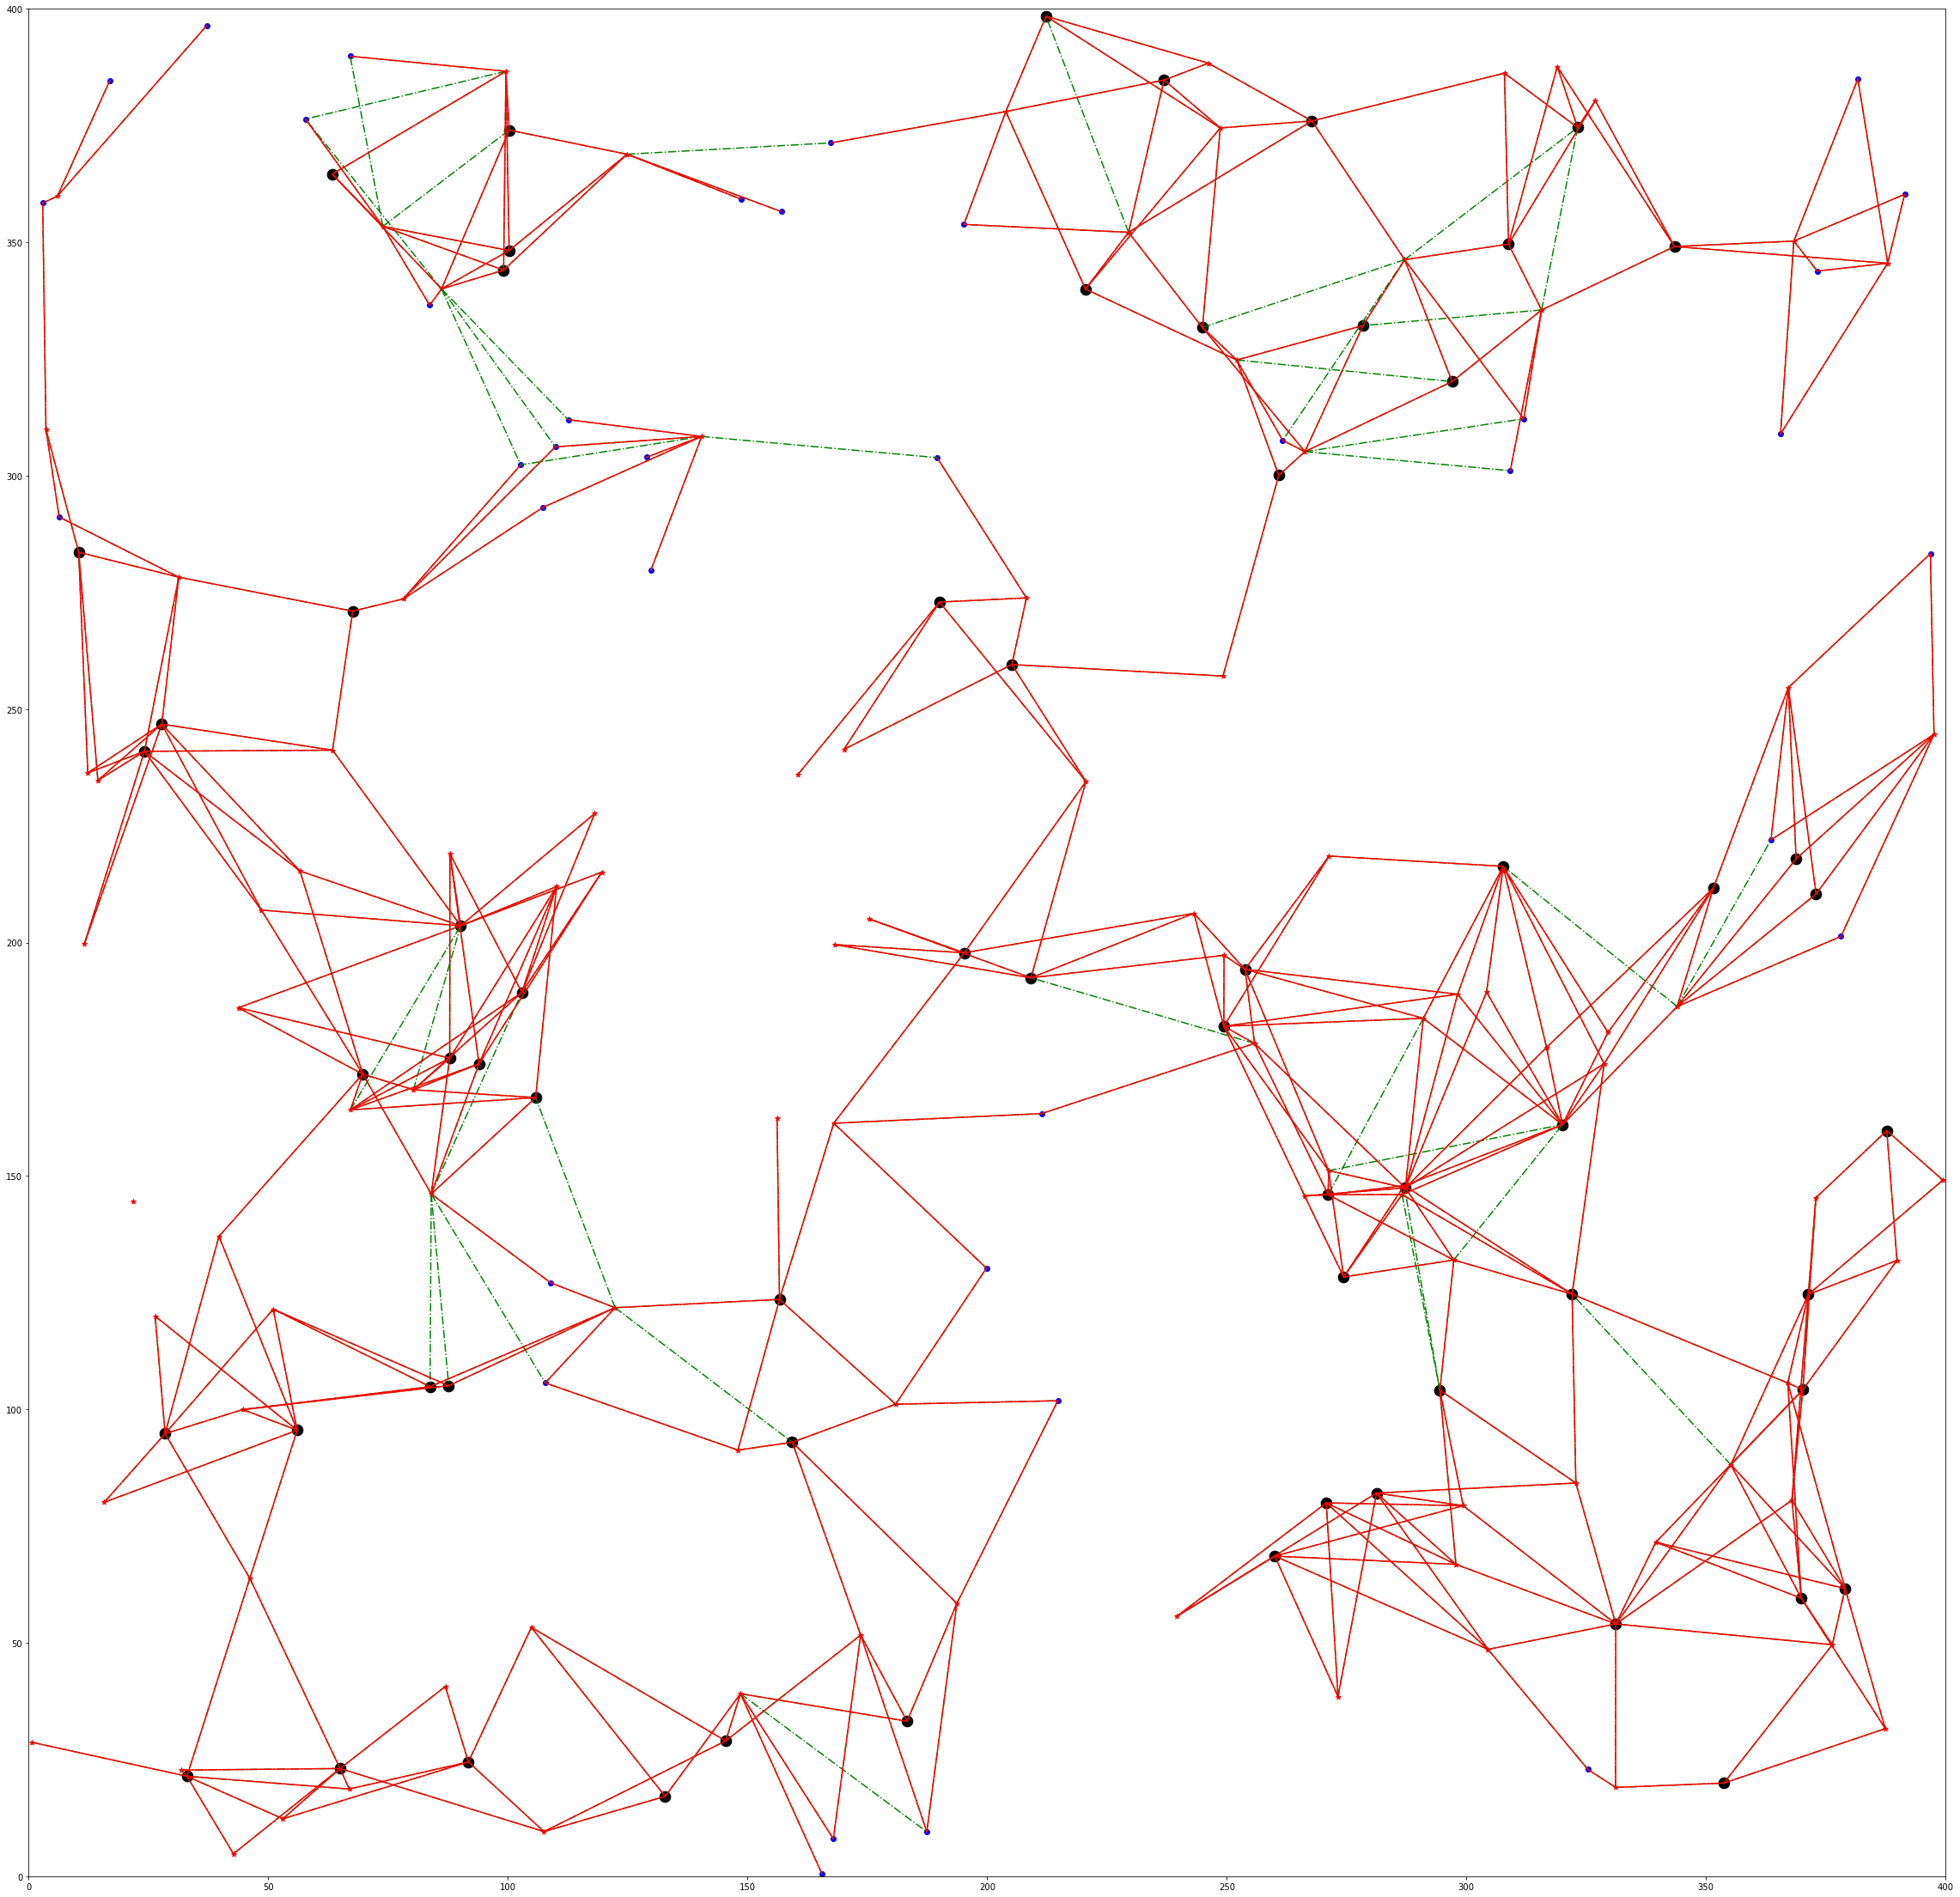

In [25]:
def greedy(sensors, clients, distances):
    sensor_connecttion = np.zeros((NUM_OF_SENSORS,1))
    client_connecttion = np.zeros((NUM_OF_CLIENTS,1))
    connection_matrix = np.zeros((NUM_OF_SENSORS, NUM_OF_CLIENTS)) # connects_matrix[i][j]=1 代表i号sensor决定连接j号client
    # 这个函数用来储存每个sensor连接其检测能力下的最近的n个client, 也可以说是决定连接的client,不过没有必要最终使得每个决定连接的client都有足够多（CLIENT_CONNECT_NEED）个server连接
                
    for i in range(NUM_OF_SENSORS):
        sortdist = np.sort(distances[i])
        for j in np.argsort(distances[i])[:min(SERVERS_CONNECT_ABILITY,len(sortdist[sortdist <= SENSOR_DISTANCE]))]:
            sensor_connecttion[i][0] += 1
            client_connecttion[j][0] += 1
            assert connection_matrix[i][j] == 0
            connection_matrix[i][j] = 1

    '''
    potentialConnect = {}
    potentialConnectDist = {}
    potentialConnectFlag = {}
    for i in range(NUM_OF_SENSORS):
        length = len(np.argwhere(distances[i,:] <= SENSOR_DISTANCE).reshape(1,-1)[0])
        potentialConnect[i] = (distances[i,:]).argsort()[:length]
        potentialConnectDist[i] = distances[i,:][(distances[i,:]).argsort()][:length]
        potentialConnectFlag[i] = np.zeros((length,1))
    '''
    num_of_success_clients = len(client_connecttion[client_connecttion>=CLIENT_CONNECT_NEED])
    
    return connection_matrix, num_of_success_clients


def draw_picture(sensors, clients, distances, connection_matrix):
    f = plt.figure(figsize=(40,40))
    ax = plt.subplot(1,1,1)
    ax.scatter(sensors[:,0],sensors[:,1], c = 'r',marker='*')
    ax.scatter(clients[:,0],clients[:,1], c = 'b',marker='o')

    for i in range(NUM_OF_SENSORS): # 绘制所有在检测范围内的线
        for j in range(NUM_OF_CLIENTS):
            if distances[i][j] <= SENSOR_DISTANCE:
                ax.plot((sensors[i][0],clients[j][0]), (sensors[i][1],clients[j][1]), 'g-.')

    for i in range(NUM_OF_SENSORS): # 对于每一个sensor，绘制其检测范围内以最大连接能力可以连接的最近的点
        for j in range(NUM_OF_CLIENTS):
            if connection_matrix[i][j] == 1:
                ax.plot((sensors[i][0],clients[j][0]), (sensors[i][1],clients[j][1]), 'r-')
    
    for j in range(NUM_OF_CLIENTS): #绘制检测成功的client
        if np.sum(connection_matrix[:,j])>=CLIENT_CONNECT_NEED:
            ax.scatter(clients[j][0],clients[j][1], c = 'k',marker='o',s = 160)

    
    ax.set_ylim(0,LENGTH_OF_SQUARE)
    ax.set_xlim(0,LENGTH_OF_SQUARE)
    

connection_matrix, num_of_success_clients =  greedy(sensors, clients, distances)
print(num_of_success_clients)
draw_picture(sensors, clients, distances, connection_matrix)